# AirBnB 
The project entails developing a machine learning-based solution for Airbnb to suggest appropriate listing prices to property owners in Antwerp, Belgium. This requires analyzing datasets from the company's data warehouse, including listings, calendar, hosts, and reviews information. The tasks involve data understanding and feature creation, data quality checks, variable profiling, and modeling to predict listing prices using various regression techniques. The goal is to identify significant predictors affecting prices and ensure the data's readiness for analysis through cleaning and transformation processes.

In [1]:
import pandas as pd

In [2]:
# Load the provided datasets
calendar_df = pd.read_csv('calendar.csv')
hosts_df = pd.read_csv('hosts.csv')
listings_df = pd.read_csv('listings.csv')
reviews_df = pd.read_csv('reviews.csv')

In [3]:
# Display the first few rows of each dataframe to understand their structure
print("Calendar : ", calendar_df.shape)
display(calendar_df.head())
print("Hosts : ", hosts_df.shape)
display(hosts_df.head())

Calendar :  (319192, 8)


,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03 00:00:00.000000,0,56.0,56.0,3,5
1,2,22742449,2022-11-13 00:00:00.000000,1,95.0,95.0,2,99
2,3,34621717,2022-04-17 00:00:00.000000,0,75.0,75.0,2,1125
3,4,38281744,2022-01-31 00:00:00.000000,1,150.0,150.0,1,1000
4,5,18835003,2022-05-21 00:00:00.000000,0,100.0,100.0,2,1125


Hosts :  (1111, 5)


,host_id,host_name,host_since,host_location,host_about
0,234077,Karin,2010-09-14 00:00:00.000000,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...
1,334804,Ann,2011-01-04 00:00:00.000000,"Antwerp, Flemish Region, Belgium","Ciao, \r\nlooking forward to meet you!\r\nI lo..."
2,413052,Valérie,2011-02-27 00:00:00.000000,"Antwerp, Flanders, Belgium",NaN
3,452791,Tatiana,2011-03-20 00:00:00.000000,"Antwerp, Flanders, Belgium",World traveler with a penchant for adrenaline ...
4,462975,Els,2011-03-25 00:00:00.000000,"Edegem, Flanders, Belgium",I studied languages and cultural anthropology ...


In [4]:
print("listings : ",listings_df.shape)
display(listings_df.head(2))
print("Reviews : ",reviews_df.shape)
display(reviews_df.head())

listings :  (1749, 14)


,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077
1,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942


Reviews :  (62987, 6)


,review_id,listing_id,date,reviewer_id,reviewer_name,comments
0,1,50904,2015-05-06 00:00:00.000000,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...
1,2,50904,2021-10-10 00:00:00.000000,333559,Emilie,"Karin is a wonderful host, she was really help..."
2,3,116134,2012-03-05 00:00:00.000000,928644,Aurélien,"Amazing flat, really close from the MAS Musem,..."
3,4,116134,2012-05-25 00:00:00.000000,231288,Gail,"This is a well equipped, very comfortable apar..."
4,5,116134,2013-09-03 00:00:00.000000,7984251,Marcel,This is a very nice appartement. We really lik...


Here's an overview of the datasets provided:

### Calendar Dataset
- Shape: 319,192 rows × 8 columns
- Contains chronological data on listings, including availability, price, adjusted price, and booking constraints (minimum and maximum nights).

### Hosts Dataset
- Shape: 1,111 rows × 5 columns
- Information on hosts who've posted their listings, including their ID, name, registration timestamp, location, and a self-reported description.

### Listings Dataset
- Shape: 1,749 rows × 14 columns
- Detailed data on individual listings, covering aspects like ID, URL, name, description, geographical coordinates, property type, room type, accommodation capacity, number of bathrooms, bedrooms, beds, amenities, and host ID.

### Reviews Dataset
- Shape: 62,987 rows × 6 columns
- Data on reviews, including the listing ID, review ID, posting date, reviewer ID and name, and the review comment itself.

C:\Users\Shubham Soni\AppData\Local\Temp\ipykernel_10812\1436521710.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calendar_df['price']);


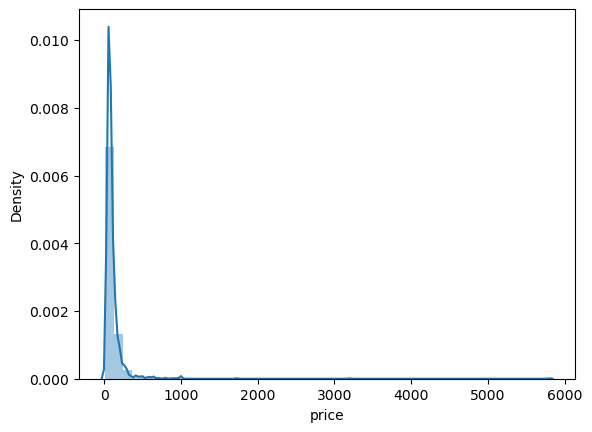

In [5]:
import seaborn as sns

sns.distplot(calendar_df['price']);

C:\Users\Shubham Soni\AppData\Local\Temp\ipykernel_10812\3486760273.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(calendar_df['price']));


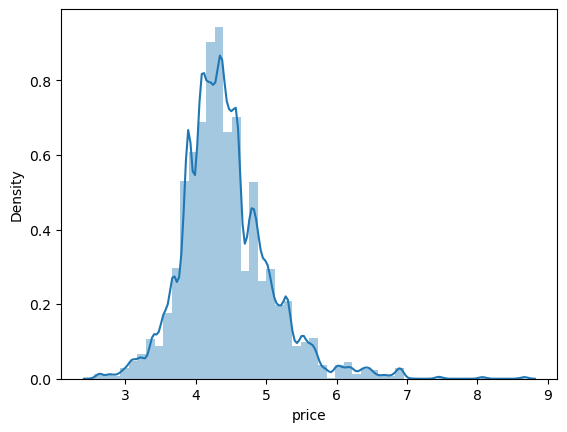

In [6]:
import numpy as np
sns.distplot(np.log(calendar_df['price']));

<Axes: >

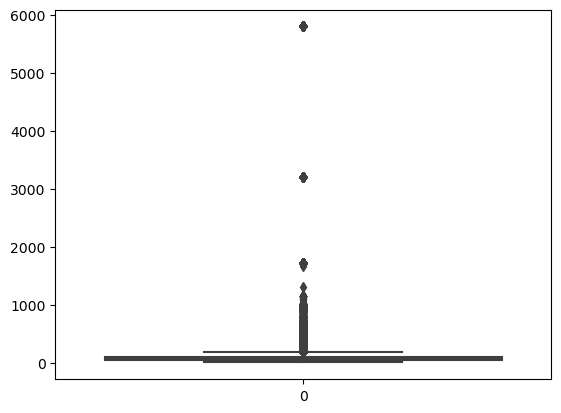

In [7]:
sns.boxplot(calendar_df['price'])

<Axes: >

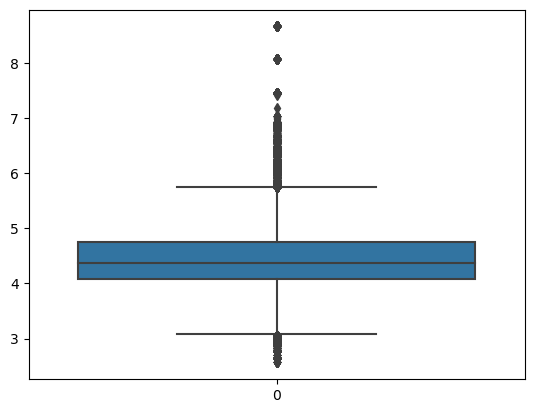

In [8]:
sns.boxplot(np.log(calendar_df['price']))